In [1]:

from datetime import datetime
import time
import os
from tqdm import tqdm
import pandas as pd
import re


In [2]:
path1 = 'D:/CCFinder/Commit2So_bug(A commit only corresponds to the latest so)/'
commit1_list = os.listdir(path1)
print(len(commit1_list))
commit1_list[:5]

3636


['D-CCFinder-NewData-ActiveAndroid-3-893.java.txt',
 'D-CCFinder-NewData-afinal-0-290.java.txt',
 'D-CCFinder-NewData-afinal-0-293.java.txt',
 'D-CCFinder-NewData-AgentWeb-0-1040.java.txt',
 'D-CCFinder-NewData-algs4-1-2381.java.txt']

In [3]:
so2commit = dict()
for file in tqdm(commit1_list):
    with open(path1+file, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        line = lines[0].rstrip('\n')
    if line not in so2commit.keys():
        so2commit[line] = 1
    else:
        so2commit[line] += 1


100%|██████████| 3636/3636 [00:00<00:00, 5506.30it/s]


In [4]:
print(len(so2commit))

1842


In [5]:
sort_so2commit = sorted(so2commit.items(), key=lambda x: x[1],reverse=True)[:5]


In [6]:
sort_so2commit

[('//CreationDate = 2018-05-16T14:33:51.190//Tags = <java><list><spring-mvc><vaadin><user-input>//Score = 0//Title = Displaying user input via list//AnswerCount = 1//CommentCount = 5',
  116),
 ('//CreationDate = 2016-11-04T22:02:58.530//Tags = <java><android><mqtt><mosquitto><paho>//Score = 1//Title = How to publish only one message using a Java MQTT client using Eclipse Paho//AnswerCount = 2//CommentCount = 0',
  65),
 ('//CreationDate = 2020-06-11T08:05:37.670//Tags = <java><spring-boot><elasticsearch><spring-data-jpa>//Score = 0//Title = elasticsearch string search with spring data jpa gives error for string "abc ::xyz"//AnswerCount = 0//CommentCount = 0',
  53),
 ('//CreationDate = 2017-12-03T20:42:17.700//Tags = <java><php><android><mysqli>//Score = 1//Title = Andorid studio app not saving data to database and send confirmation email//AnswerCount = 1//CommentCount = 0',
  38),
 ('//CreationDate = 2012-05-07T02:30:42.123//Tags = <java><rdf><jena>//Score = 5//Title = How to get nes

In [7]:
count = [0]*6

for k,v in tqdm(so2commit.items()):
    if v==1:
        count[0]+=1
    elif 2<=v<20:
        count[1]+=1
    elif 20<=v<40:
        count[2]+=1
    elif 40<=v<60:
        count[3]+=1
    elif 60<=v<80:
        count[4]+=1
    elif v>=80:
        count[5]+=1

100%|██████████| 1842/1842 [00:00<00:00, 1846536.32it/s]


In [9]:
count,sum(count)

([1291, 541, 7, 1, 1, 1], 1842)

In [10]:
select_post = [sort_so2commit[0][0],
               sort_so2commit[1][0],
               sort_so2commit[2][0]]

select_post

['//CreationDate = 2018-05-16T14:33:51.190//Tags = <java><list><spring-mvc><vaadin><user-input>//Score = 0//Title = Displaying user input via list//AnswerCount = 1//CommentCount = 5',
 '//CreationDate = 2016-11-04T22:02:58.530//Tags = <java><android><mqtt><mosquitto><paho>//Score = 1//Title = How to publish only one message using a Java MQTT client using Eclipse Paho//AnswerCount = 2//CommentCount = 0',
 '//CreationDate = 2020-06-11T08:05:37.670//Tags = <java><spring-boot><elasticsearch><spring-data-jpa>//Score = 0//Title = elasticsearch string search with spring data jpa gives error for string "abc ::xyz"//AnswerCount = 0//CommentCount = 0']

In [12]:
s2c = dict()
s2c[select_post[0]] = []
s2c[select_post[1]] = []
s2c[select_post[2]] = []
for file in tqdm(commit1_list):
    with open(path1+file, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        line = lines[0].rstrip('\n')

    if line ==select_post[0]:
        s2c[select_post[0]].append(file)
    elif line ==select_post[1]:
        s2c[select_post[1]].append(file)
    elif line ==select_post[2]:
        s2c[select_post[2]].append(file)


100%|██████████| 3636/3636 [00:00<00:00, 15511.90it/s]


In [13]:
s2c[select_post[0]]

['D-CCFinder-NewData-micrometer-1-40541.java.txt',
 'D-CCFinder-NewData-micrometer-1-40634.java.txt',
 'D-CCFinder-NewData-micrometer-1-40655.java.txt',
 'D-CCFinder-NewData-micrometer-1-40688.java.txt',
 'D-CCFinder-NewData-micrometer-1-40694.java.txt',
 'D-CCFinder-NewData-micrometer-1-40721.java.txt',
 'D-CCFinder-NewData-micrometer-1-40931.java.txt',
 'D-CCFinder-NewData-micrometer-1-40982.java.txt',
 'D-CCFinder-NewData-micrometer-1-40994.java.txt',
 'D-CCFinder-NewData-micrometer-1-41027.java.txt',
 'D-CCFinder-NewData-micrometer-1-41033.java.txt',
 'D-CCFinder-NewData-micrometer-1-41060.java.txt',
 'D-CCFinder-NewData-micrometer-1-41660.java.txt',
 'D-CCFinder-NewData-micrometer-1-41708.java.txt',
 'D-CCFinder-NewData-micrometer-1-41720.java.txt',
 'D-CCFinder-NewData-micrometer-1-41753.java.txt',
 'D-CCFinder-NewData-micrometer-1-41759.java.txt',
 'D-CCFinder-NewData-micrometer-1-41786.java.txt',
 'D-CCFinder-NewData-micrometer-1-44987.java.txt',
 'D-CCFinder-NewData-micrometer

In [19]:
select_post[0]

'//CreationDate = 2018-05-16T14:33:51.190//Tags = <java><list><spring-mvc><vaadin><user-input>//Score = 0//Title = Displaying user input via list//AnswerCount = 1//CommentCount = 5'

In [14]:
commit_info = [[],[],[]]
for i in tqdm(range(0,3)):
    commit_list = s2c[select_post[i]]
    # commit_list = [c.split('.txt')[0].replace('-','/').replace('D/','D:/') for c in commit_list]
    commit_list = ['/'.join(c.split('-')[:3]).replace('D/','D:/')+'/'+'-'.join(c.split('-')[3:-2])+'/'+'/'.join(c.split('-')[-2:]).split('.txt')[0] for c in commit_list]
    for commit in commit_list:
        with open(commit,'r') as f1:
            lines = f1.readlines()
            text_path=lines[1].split('////filename: ')[1].replace('D:/', 'E:/').split('/new/')[0]+'/'+'0.txt'
            with open(text_path, 'r', encoding='utf-8') as f2:
                text_lines = f2.readlines()
                commit_info[i].append(text_lines[-1].rstrip('\n'))





100%|██████████| 3/3 [00:02<00:00,  1.44it/s]


In [15]:
commit_info = [list(set(i)) for i in commit_info]


In [17]:
len(commit_info[0])

31

In [18]:
commit_info[0]

['注释信息: Revert "Fix Gradle dependency locking"',
 '注释信息: Polish to fix the `1.0.x` build.',
 '注释信息: Re-add JettyStatisticsMetrics and deprecate it in favor of TimedHandler (fixes #2089)',
 "注释信息: Don't report on close for Graphite/Ganglia if registry is disabled (fixes #853)",
 '注释信息: StepTimer#mean should work regardless of other calls (fixes #1814)',
 '注释信息: Fix LogbackMetrics ignoreMetrics will ignore forever (#2271)',
 '注释信息: Fix that deny filters always take precedence',
 '注释信息: Restore meter name suffixes for LongTaskTimer in PrometheusMeterRegistry (#2110)',
 '注释信息: Fix a NPE with jetty client and no request body (#2204)',
 '注释信息: Fix ElasticMeterRegistryTest.writeMeter()',
 '注释信息: Fix NPE in MongoMetricsConnectionPoolListener.registerGauge() (#2118)',
 '注释信息: Fix deadlock in TelegrafStatsdLineBuilder (#2326)',
 '注释信息: Fix spring.aop.auto property reference',
 '注释信息: Add structural pattern matching for meters (fixes #782)',
 '注释信息: Polish AppOpticsConfig javadoc (fixes #932)',
 

In [119]:
x = [i.split('注释信息: ')[1] for i in commit_info[0]]
x

['Restore meter name suffixes for LongTaskTimer in PrometheusMeterRegistry (#2110)',
 'Fix NPE in MongoMetricsConnectionPoolListener.registerGauge() (#2118)',
 'Allow `ExecutorServiceMetrics` accepting metric name prefix (#1920)',
 'Add structural pattern matching for meters (fixes #782)',
 'WavefrontPropertiesConfigAdapter extends StepRegistryPropertiesConfigAdapter (fixes ##929)',
 'StepTimer#mean should work regardless of other calls (fixes #1814)',
 'Fix telegraf statsd line sanitization',
 'Fix LogbackMetrics ignoreMetrics will ignore forever (#2271)',
 'Add void returning match, fix matching of TimeGauge',
 'Fix classloading issue when using a Java EE container (#2205)',
 'Record idle time on executor metrics (fixes #763)',
 'Use a fixed version for Kafka Docker image (#2211)',
 'Fix logic to remove Kafka meters with less tags (#2312)',
 'Fix base unit for executor.queue.remaining (#1457)',
 'Revert "Fix Gradle dependency locking"',
 'fix FunctionCounter for AtlasMeterRegistry',


In [16]:
with open('./bug_commit_msg.txt','w',encoding='utf-8') as f:
    for idx in range(3):
        x = [i.split('注释信息: ')[1] for i in commit_info[idx]]
        for w in x:
            f.write(w+'\n')

In [17]:
with open('./bug_commit_msg.txt','r',encoding='utf-8') as f:
    lines = f.readlines()
    lines = [i.rstrip() for i in lines]

In [18]:
len(lines)

146

In [26]:
import nltk
from nltk.corpus import stopwords
def separate_sentence(text):
    text = text.lower()
    remove_chars = '[·’!"\#$%&\'()＃！（）*+,.:;<=>?\@，：?￥★、…．＞【】［］《》？“”‘’\[\\]^_`{|}~]+'
    text = re.sub(remove_chars, "", text)

    disease_List = nltk.word_tokenize(text)

    filtered = [w for w in disease_List if(w not in stopwords.words('english'))]

    Rfiltered =nltk.pos_tag(filtered)

    filter_word = [i[0] for i in Rfiltered]
    return ' '.join(filter_word)

In [27]:
separate_sentence(' [Fix-3616][Server] when worker akc/response master exception , async retry (#3776)')

'fix-3616server worker akc/response master exception async retry 3776'

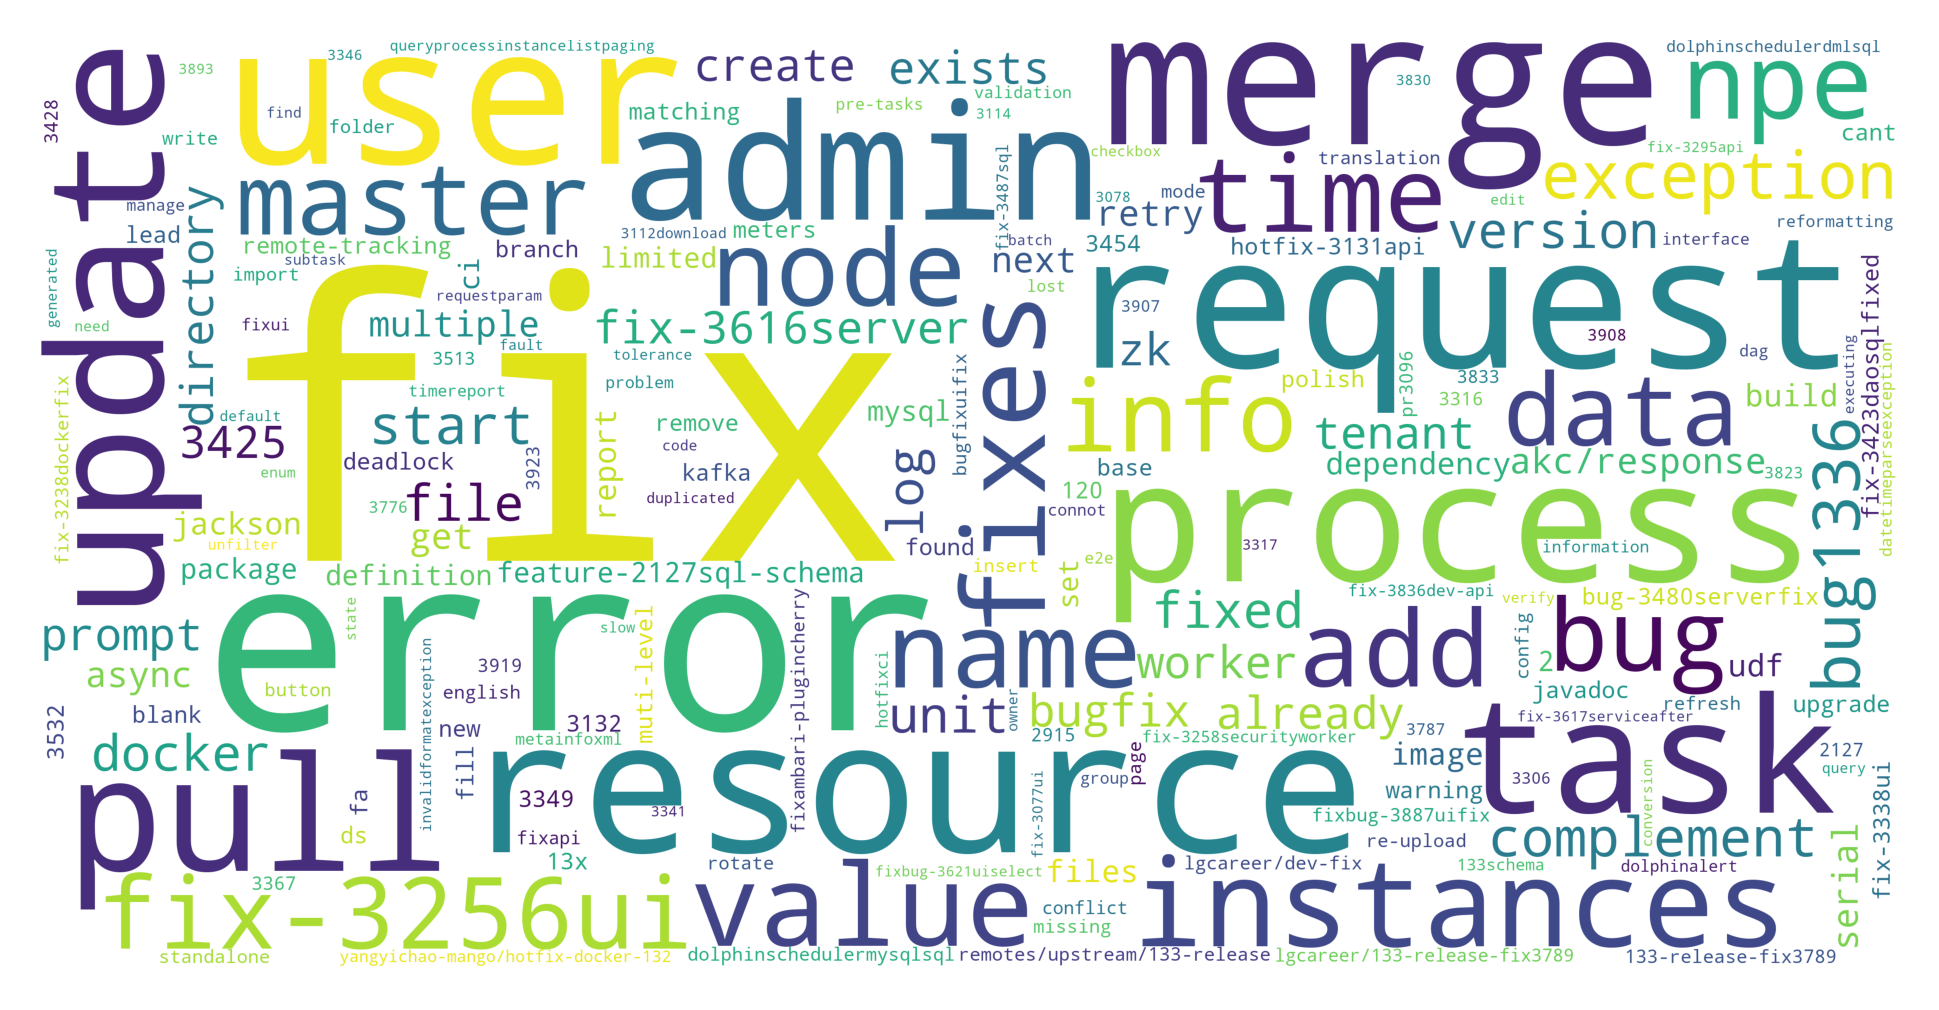

In [42]:
import wordcloud
import matplotlib.pyplot as plt

words_list = (' '.join([separate_sentence(i) for i in lines])).split(' ')


dict = {}
for key in words_list:
    dict[key] = dict.get(key, 0) + 1
plt.figure(dpi=400)
wordcloud = wordcloud.WordCloud(height=2000,width=4000,background_color='white').fit_words(dict)


plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('./pic/commit_msg_wordclound.jpg',bbox_inches = 'tight')